## Ejercicio Time Series Forecast
Para este ejercicio vamos a predecir cuál será la demanda de pasajeros de una aerolinea, para poder anticiparse a las contrataciones de personal, mantenimiento de las aeronaves y gestión de inventario y comidas.

Para ello, se pide:
1. Carga datos (AirPassengers.csv) y representa la serie. ¿Hay seasonality? ¿Cada cuanto?
2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window con el valor de seasonality obtenido en el apartado anterior. Tienes que usar la función rolling() del DataFrame.
3. Comprueba de manera estadística si la serie es o no stationary.
4. Aplica una transformación logarítmica sobre los datos para mejorar el proceso de transformación de tu time series a stationary. Acuérdate después del forecast de invertir la transformación.
5. Divide en train y test. Guarda 20 muestras para test.
6. Crea tu primer modelo ARIMA. Habrá varias combinaciones en función de sus hiperparámetros... Mide el MAE y RMSE del modelo en predicción. Ten en cuenta el parámetro "m" de la función ARIMA, mediante el cual se establece el seasonality.
7. Representa en una gráfica los datos de test y tus predicciones.
8. Prueba un decission tree y un random forest, a ver qué performance presentan.

In [1]:
from dateutil.parser import parse 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
# warnings.filterwarnings("ignore")

## 1. Carga datos (AirPassengers.csv) y representa la serie. ¿Hay seasonality? ¿Cada cuanto?


In [2]:
df = pd.read_csv(".\data\AirPassengers.csv", parse_dates=["date"])
df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vipre\AppData\Local\Temp\ipykernel_2256\918319083.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv(".\data\AirPassengers.csv", parse_dates=["date"])


,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    144 non-null    datetime64[ns]
 1   value   144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


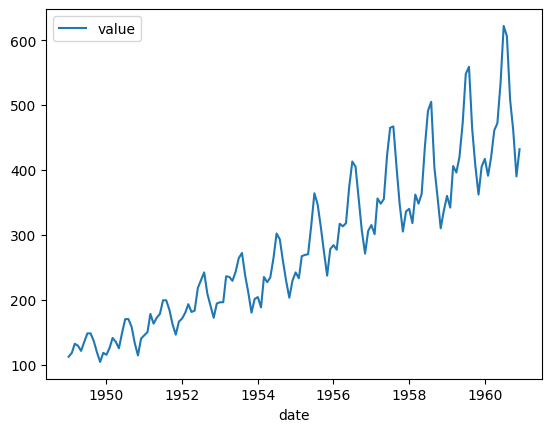

In [4]:
plt.plot(df["date"], df["value"], label= "value")
plt.xlabel('date')
plt.legend()

## 2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window con el valor de seasonality obtenido en el apartado anterior. Tienes que usar la función rolling() del DataFrame.

In [5]:
df.set_index('date', inplace=True)
df

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [6]:
df_ma = df["value"].rolling(window=12).mean()

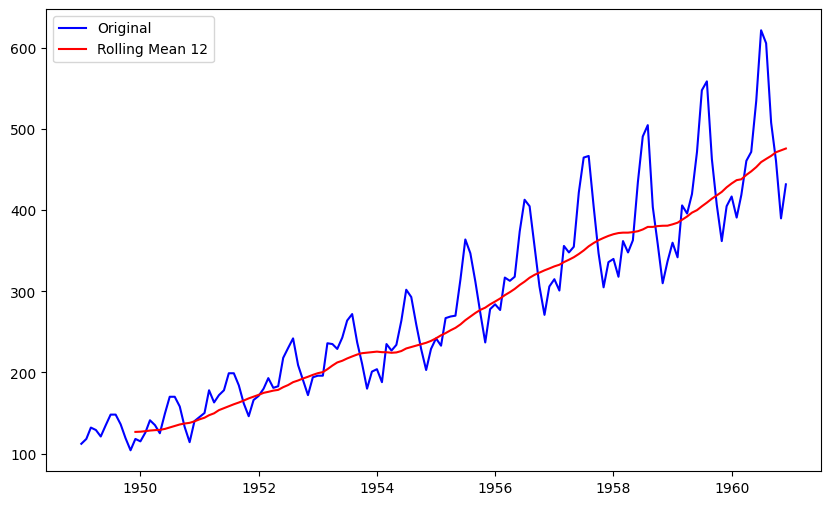

In [7]:
plt.figure(figsize=(10,6))
plt.plot(df['value'], color='blue', label='Original')
plt.plot(df_ma, color='red', label='Rolling Mean 12')
plt.legend(loc='best')

# plt.plot(df["date"], df["value"], label= "value")
# plt.plot
# plt.xlabel('date')
# plt.legend()

## 3. Comprueba de manera estadística si la serie es o no stationary.

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
adfuller(df["value"])

(0.8153688792060463,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [10]:
print( " 0.991880243437641, la serie no es estacionaria, el adfuller (p_value) dio menor 0,05")

 0.991880243437641, la serie no es estacionaria, el adfuller (p_value) dio menor 0,05


## 4. Aplica una transformación logarítmica

In [11]:
df_1 = df.copy()
df

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


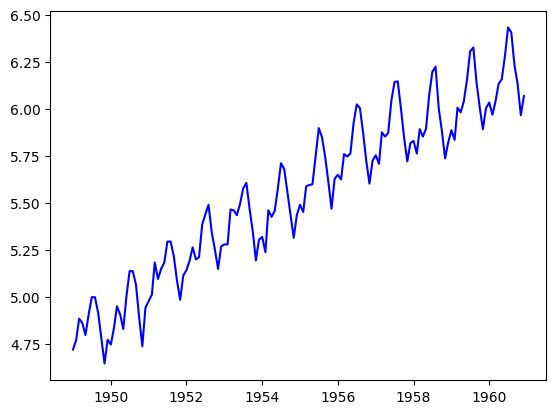

In [12]:
import numpy as np

df['log_value'] = np.log(df_1['value'])



plt.plot(df['log_value'])

plt.show()


## 5. Divide en train y test. Guarda 20 muestras para test.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   value      144 non-null    int64  
 1   log_value  144 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.4 KB


In [53]:
df

,value,log_value
date,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791
...,...,...
1960-08-01,606,6.406880
1960-09-01,508,6.230481
1960-10-01,461,6.133398


In [76]:
X = df['log_value']
train = X[:-20]
test = X[-20:]

In [77]:
print(train.shape)
print(test.shape)

(124,)
(20,)


In [16]:
# shapes de train y test

## 6. Crea tu primer modelo ARIMA

In [78]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error

In [79]:
from pmdarima.arima import ARIMA

model = auto_arima(df['log_value'], start_p=1, start_q=1,
                   max_d=3, max_p=5, max_q=5,
                   seasonal=False, stationary=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-241.608, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-231.565, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-235.386, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-237.507, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-232.439, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-269.651, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-237.605, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-269.697, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-236.952, Time=0.20 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-248.753, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-269.821, Time=0.56 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-262.543, Time=0.55 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-275.310, Time=0.33 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-274.635, Time=0.36 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept

In [64]:
# módelo con art_p=1, start_q=1, max_d=3, max_p=5, max_q=5 y stationary=False

ARIMA(order=(4, 1, 2), scoring_args={}, suppress_warnings=True)

In [80]:
# Está en loratítmicos, hay que pasar a los valores del ejercicio

predictions = model.predict(20)
np.array (predictions)

array([6.22159879, 6.29574115, 6.39678975, 6.42428448, 6.34552026,
       6.3199549 , 6.30384445, 6.26570549, 6.30756162, 6.3580192 ,
       6.36354668, 6.40124054, 6.42231003, 6.3980284 , 6.40740599,
       6.41880996, 6.40652414, 6.42924576, 6.45380481, 6.45267519])

In [81]:
# predice 20 valores

# Escala original

predictions_sc_original = np.exp(predictions)
np.array (predictions_sc_original)

array([503.50759309, 542.25759035, 599.91606035, 616.63944486,
       569.93382414, 555.547938  , 546.66951804, 526.21269513,
       548.7053629 , 577.10209894, 580.3008527 , 602.59211379,
       615.42311898, 600.65961169, 606.3188404 , 613.27286026,
       605.7843982 , 619.70636302, 635.11418969, 634.39715462])

In [84]:
# predice 20 valores

array([396.80138345, 395.79112516, 369.52313598, 387.27007933,
       364.88245741, 381.961082  , 378.29898929, 376.23006892,
       389.42713079, 372.28691084, 389.13738288, 375.00996104,
       381.30256629, 382.37160442, 374.22919603, 387.11052311,
       373.41134741, 385.05707763, 378.37808096, 378.93797036])

In [82]:
test.values

array([6.04025471, 6.15697899, 6.30627529, 6.32614947, 6.13772705,
       6.00881319, 5.89164421, 6.00388707, 6.03308622, 5.96870756,
       6.03787092, 6.13339804, 6.15697899, 6.28226675, 6.43294009,
       6.40687999, 6.23048145, 6.13339804, 5.96614674, 6.06842559])

In [31]:
# test.values

array([6.04025471, 6.15697899, 6.30627529, 6.32614947, 6.13772705,
       6.00881319, 5.89164421, 6.00388707, 6.03308622, 5.96870756,
       6.03787092, 6.13339804, 6.15697899, 6.28226675, 6.43294009,
       6.40687999, 6.23048145, 6.13339804, 5.96614674, 6.06842559])

In [66]:
# MAE test
# MAPE test

MAE 0.12657252410066783
MAPE 0.020640169700076615


In [83]:
print("MAE:", mean_absolute_error(test, predictions))
print("MAPE:", mean_absolute_percentage_error(test, predictions))


MAE: 0.23606847238218248
MAPE: 0.03894310782241218


In [84]:
# reentrena el módelo incluyendo el argumento m=12

model = ARIMA(order=(2, 0, 0), seasonal_order=(0, 1, 1, 12), suppress_warnings=True)
model.fit(df['log_value'])

ARIMA(order=(2, 0, 0), seasonal_order=(0, 1, 1, 12), suppress_warnings=True)

In [85]:
# vuelve a predecir 20 valores y obtén MAE test y MAPE test

# compara con los valores previos

predictions= model.predict(n_periods=20)
predictions_sc_original  = np.exp(predictions)
predictions_sc_original

1961-01-01    452.315165
1961-02-01    429.544491
1961-03-01    485.883669
1961-04-01    501.768358
1961-05-01    520.798023
1961-06-01    598.816191
1961-07-01    689.898250
1961-08-01    688.658209
1961-09-01    577.533150
1961-10-01    515.502815
1961-11-01    446.447813
1961-12-01    496.394113
1962-01-01    517.497708
1962-02-01    490.709515
1962-03-01    553.966261
1962-04-01    571.197182
1962-05-01    592.026577
1962-06-01    679.890619
1962-07-01    782.470265
1962-08-01    780.337642
Freq: MS, dtype: float64

In [86]:
print("MAE:", mean_absolute_error(test, predictions))
print("MAPE:", mean_absolute_percentage_error(test, predictions))

MAE: 0.24992024758967965
MAPE: 0.04129544655022639


In [95]:
# reentrena el módelo incluyendo el argumento m=12

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

MAE 0.02702695363004102
MAPE 0.004412233526458519


## 7. Representa en una gráfica los datos de test y tus predicciones.

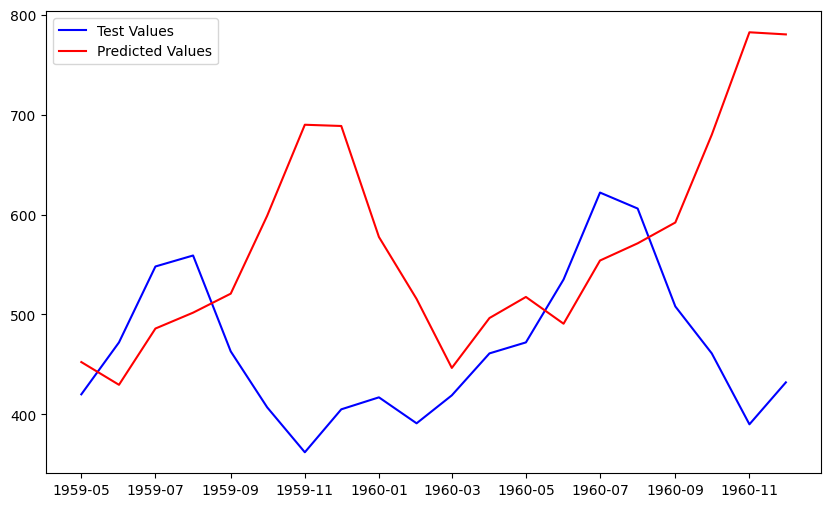

In [89]:
test_values = df['value'][-20:]

# Plot the test values and predictions
plt.figure(figsize=(10,6))
plt.plot(test_values, color='blue', label='Test Values')
plt.plot(test_values.index, predictions_sc_original, color='red', label='Predicted Values')
plt.legend(loc='best')

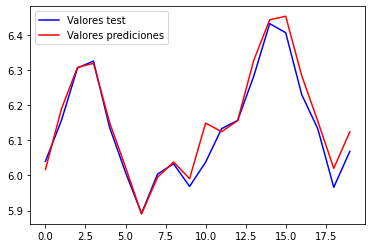

## 8. Prueba otros modelos, a ver qué performance presentan.

In [98]:
# Transforma el df para poder usarlo con otros módelos

,value,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,,,
1950-01-01,4.744932,4.718499,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685
1950-02-01,4.836282,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932
1950-03-01,4.948760,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282
1950-04-01,4.905275,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282,4.948760
1950-05-01,4.828314,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282,4.948760,4.905275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,6.406880,6.326149,6.137727,6.008813,5.891644,6.003887,6.033086,5.968708,6.037871,6.133398,6.156979,6.282267,6.432940
1960-09-01,6.230481,6.137727,6.008813,5.891644,6.003887,6.033086,5.968708,6.037871,6.133398,6.156979,6.282267,6.432940,6.406880
1960-10-01,6.133398,6.008813,5.891644,6.003887,6.033086,5.968708,6.037871,6.133398,6.156979,6.282267,6.432940,6.406880,6.230481


In [ ]:
# Divide en X e y, en train/test y muestra los shapes obtenidos

(112, 12)
(20, 12)
(112,)
(20,)


In [107]:
X_test

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,,
1959-05-01,5.894403,6.075346,6.196444,6.224558,6.001415,5.883322,5.736572,5.820083,5.886104,5.834811,6.006353,5.981414
1959-06-01,6.075346,6.196444,6.224558,6.001415,5.883322,5.736572,5.820083,5.886104,5.834811,6.006353,5.981414,6.040255
1959-07-01,6.196444,6.224558,6.001415,5.883322,5.736572,5.820083,5.886104,5.834811,6.006353,5.981414,6.040255,6.156979
1959-08-01,6.224558,6.001415,5.883322,5.736572,5.820083,5.886104,5.834811,6.006353,5.981414,6.040255,6.156979,6.306275
1959-09-01,6.001415,5.883322,5.736572,5.820083,5.886104,5.834811,6.006353,5.981414,6.040255,6.156979,6.306275,6.326149
1959-10-01,5.883322,5.736572,5.820083,5.886104,5.834811,6.006353,5.981414,6.040255,6.156979,6.306275,6.326149,6.137727
1959-11-01,5.736572,5.820083,5.886104,5.834811,6.006353,5.981414,6.040255,6.156979,6.306275,6.326149,6.137727,6.008813
1959-12-01,5.820083,5.886104,5.834811,6.006353,5.981414,6.040255,6.156979,6.306275,6.326149,6.137727,6.008813,5.891644
1960-01-01,5.886104,5.834811,6.006353,5.981414,6.040255,6.156979,6.306275,6.326149,6.137727,6.008813,5.891644,6.003887


In [106]:
y_test

date
1959-05-01    6.040255
1959-06-01    6.156979
1959-07-01    6.306275
1959-08-01    6.326149
1959-09-01    6.137727
1959-10-01    6.008813
1959-11-01    5.891644
1959-12-01    6.003887
1960-01-01    6.033086
1960-02-01    5.968708
1960-03-01    6.037871
1960-04-01    6.133398
1960-05-01    6.156979
1960-06-01    6.282267
1960-07-01    6.432940
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: value, dtype: float64

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
# entrena el random forest

# muestra el mean_absolute_percentage_error de test

0.013769863496171658

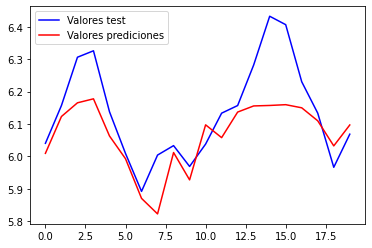

In [111]:
# feature_importances_

array([0.89574548, 0.01420781, 0.00129769, 0.00172738, 0.00228326,
       0.00155955, 0.00120087, 0.00176066, 0.00192478, 0.00514753,
       0.00241009, 0.07073491])

Prueba otro enfoque, esta vez que la fecha NO sea el índice

In [114]:
# Crea nuevas columnas con shifts de 1, 11, 12, 13

,date,value,t-1,t-11,t-12,t-13
0,1949-01-01,4.718499,NaN,NaN,NaN,NaN
1,1949-02-01,4.770685,4.718499,NaN,NaN,NaN
2,1949-03-01,4.882802,4.770685,NaN,NaN,NaN
3,1949-04-01,4.859812,4.882802,NaN,NaN,NaN
4,1949-05-01,4.795791,4.859812,NaN,NaN,NaN
...,...,...,...,...,...,...
139,1960-08-01,6.406880,6.432940,6.137727,6.326149,6.306275
140,1960-09-01,6.230481,6.406880,6.008813,6.137727,6.326149
141,1960-10-01,6.133398,6.230481,5.891644,6.008813,6.137727
142,1960-11-01,5.966147,6.133398,6.003887,5.891644,6.008813


In [120]:
# Divide en X e y, en train/test y muestra los shapes obtenidos

(112, 4)
(19, 4)
(112,)
(19,)


In [128]:
# entrena el random forest

# muestra el mean_absolute_percentage_error de test y train

0.01174169752011279
0.0035352065840446485


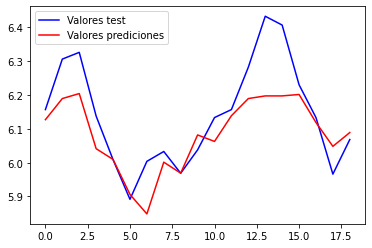